<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/4_1_Network_Analysis_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1** Network Analysis - Introduction

Network analysis is essential in analysis of data not only because social
networks create huge amount of data, but also many data have networkstructured.
One of simple ways to introduce a network structure is to analyze
correlations between variables and create correlation networks, which
are widely used data mining method for studying biological networks ( for
example, biological networks) based on pairwise correlations between variables.


Networks can be conveniently modeled by graphs, which we often refer
to as a social graph. The individuals within a network are the nodes, and
an edge connects two nodes if the nodes are related by the relationship that
characterizes the network. The explosive growth of social media in recent
years has attracted millions of end users, thus creating social graphs with
millions of nodes and billions of edges reflecting the interactions and relationship
between these nodes.


Networks often exhibit community structure with inherent clusters. Detecting
clusters or communities is one of the critical tasks in network analysis
because of its broad applications to matters such as friend recommendations,
link predictions and collaborative filtering in online social networks. From the
graph theory perspective, clustering and community detection essentially are
to discover a group of nodes in a graph that are more connected with eachother within the group than those nodes outside the group. Given the size
and complexity of todays’ networks, clustering and community detection in
these networks face the inherent challenges.


Communities (clusters) are essential to gain spatio-temporal inside into
big datasets from networks. Spatial distances often describe the strength of
network connectivity among communities (clusters) rather than individual
nodes. As a result, good clustering results will enable us to capture key characteristics
of datasets in networks.

## **4.1.1** Graph Models

In this section, we briefly review some of the common notation used in graphs. Any graph consists of both a set of objects, called nodes, and the connections between these nodes, called edges. Mathematically, a graph $G$ is denoted as pair $G(V, E)$, where $V=\left\{v_{1}, v_{2}, \ldots v_{n}\right\}$ represents the set of nodes and $E=$ $\left\{e_{1}, e_{2}, \ldots, e_{m}\right\}$ represents the set of edges and the size of the set is commonly shown as $m=|E|$. Edges are also represented by their endpoints (nodes), so $e\left(v_{1}, v_{2}\right)$ or $\left(v_{1}, v_{2}\right)$ defines an edge between nodes $v_{1}$ and $v_{2}$. Edges can have directions if one node is connected to another, but not vice versa. When edges have directions, $e\left(v_{1}, v_{2}\right)$ is not the same as $e\left(v_{2}, v_{1}\right)$. When edges are undirected, nodes are connected both ways and are called undirected edges and this kind of graph is called an undirected graph. Graphs that only have directed edges are called directed graphs and ones that only have undirected edges are called undirected graphs. Finally, mixed graphs have both directed and undirected edges.

A sequence of edges where nodes and edges are distinct, $e_{1}\left(v_{1}, v_{2}\right), e_{2}\left(v_{2}, v_{3}\right)$, $e_{3}\left(v_{3}, v_{4}\right), \ldots, e_{i}\left(v_{i}, v_{i+1}\right)$, is called a path. A closed path is called a cycle. The length of a path or cycle is the number of edges traversed in the path or cycle. In a directed graph, we only count directed paths because traversal of edges is only allowed in the direction of the edges. For a connected graph, multiple paths can exist between any pair of nodes. Often, we are interested in the path that has the shortest length. This path is called the shortest path. We will also use the shortest path as distance for modeling on networks. The concept of the neighborhood of a node $v_{i}$ can be generalized using shortest paths. An $n$-hop neighborhood of node $v_{i}$ is the set of nodes that are within $n$ hops distance from the node $v_{i}$.

The degree of a node in a graph, which is the number of edges connected to the node, plays a significant role in the study of graphs. For a directed graph, there are two types of degrees 1 ) in-degrees (edges toward the node) and 2 ) out-degrees (edges away from the node). In a network, nodes with the most connections possess the greatest degree of centrality. Degree centrality measures relative levels of importance. We often regard people with many interpersonal connections to be more important than those with few. Indegree centrality describes the popularity of a node and its prominence or prestige. Out-degree centrality describes the gregariousness of the node. For social media, degree represents the number of friends for each given user. On Facebook, a degree represents the number of friends. For Twitter, in-degree and out-degree show the number of followers and followees respectively.

## **4.1.2** Laplacian Matrix

A graph with $n$ nodes can be represented by a $n \times n$ adjacency matrix. A value of 1 at row $i$, column $j$ in the adjacency matrix indicates a connection between nodes $v_{i}$ and $v_{j}$, and a value of 0 denotes no connection between the two nodes. When generalized, any real number can be used to show the strength of connection between two nodes. In directed graphs, we can have two edges between $i$ and $j$ (one from $i$ to $j$ and one from $j$ to $i$ ), whereas in undirected graphs only one edge can exist. As a result, the adjacency matrix for directed graphs is not in general symmetric, whereas the adjacency matrix for undirected graphs is symmetric $\left(A=A^{T}\right)$. In social media, there are many directed and undirected networks. For instance, Facebook is an undirected network and Twitter is a directed network.

Consider a weighted graph $G=(V, E)$ with $n$ vertices and $m$ edges each with weights $E_{i, j}$ connecting nodes $i, j$. The adjacency of matrix $M$ of a graph is defined by $M_{i j}=E_{i j}$ if there is an edge $\{i, j\}$ and $M_{i j}=0$, otherwise. The Laplacian matrix $L$ of $\mathrm{G}$ is an $n$ by $n$ symmetric matrix, with one row and column for each vertex, such that
$$
L_{i j}=\left\{\begin{array}{lr}
\sum_{k} E_{i k}, & i=j \\
-E_{i j}, & i \neq j, \text { and } v_{i} \text { is adjacent to } v_{j} \\
0, & \text { otherwise }
\end{array}\right.
$$
In addition, a $n \times m$ incidence matrix of $G$, denoted by $I_{G}$ has one row per vertex and one column per edge. The column corresponding to edge $\{i, j\}$ of $I_{G}$ is zero except the $i$-th and $j$-th entries, which are $\sqrt{E_{i j}}$ and $-\sqrt{E_{i j}}$. respectively. Adjacent matrix can effectively describe a graph as demonstrated in the following two examples.

### Calculating Laplacian Matrix in Python with `scipy`

The Laplacian matrix of a graph is sometimes referred to as the “Kirchoff matrix” or the “admittance matrix”, and is useful in many parts of spectral graph theory. In particular, the eigen-decomposition of the laplacian matrix can give insight into many properties of the graph.

We can use `scipy.sparse.csgraph.laplacian` to calculate the Laplacian matrix  of a directed graph.

In [1]:
import numpy as np
from scipy.sparse import csgraph
G = np.arange(5) * np.arange(5)[:, np.newaxis]
G

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [2]:
csgraph.laplacian(G, normed=False)

array([[  0,   0,   0,   0,   0],
       [  0,   9,  -2,  -3,  -4],
       [  0,  -2,  16,  -6,  -8],
       [  0,  -3,  -6,  21, -12],
       [  0,  -4,  -8, -12,  24]])

## [Graph Laplacian and Spectral Clustering in Python](https://towardsdatascience.com/graph-laplacian-and-its-application-in-machine-learning-7d9aab021d16)


In [3]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score

random_state = 213
np.random.seed(random_state)

### 1. Construction of k-nearest graph from dataset

In [5]:
data_size = 150
features,y = make_moons(n_samples=data_size, noise=0.07, random_state=213)
print(y.shape)

data_size = features.shape[0]

(150,)


In [6]:
features.shape, y.shape

((150, 2), (150,))

We can set mode of connectivity as 'distance' for the edges to represent the distance between 2 nodes or specify 'connectivity' to denote presence or absence of an edge between them with edge weight 1 or 0.

In case of extreme data points/outliers in the dataset, the outliers in the resulting may even have no connectivity with even a single nearest neighbors. Many real datasets have extreme data points. These data points  can be excluded in the beginning.

In [7]:
n_neighbors = 10
knn_dist_graph = kneighbors_graph(X=features, 
                             n_neighbors=n_neighbors,
                             mode='distance',
                             metric='euclidean',
                             n_jobs=6)
n_neighbors

10

In [8]:
knn_dist_graph.shape

(150, 150)

It returns a sparse graph with edges representing the distance between our data points. The distance of the first data points with its 50 neighbors is shown below. Note the sparsity of the graph and it will have continuous value representing distance at only those places/indices in the matrix which corresponds to its k nearest neighbours, the rest will be zero.



In [9]:
knn_dist_graph.todense()[0][:,:50]

matrix([[0.        , 0.        , 0.07266041, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.1943875 , 0.        ,
         0.        , 0.        , 0.15397041, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.06969749, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

This dataset is commonly used to find groups within the data points where similar data points lie in the same class or cluster.

Similarly in other such cases when you want to capture similarity within the data points rather than the distance, we can convert this graph to a similarity based graph using a Gaussian kernel with its width (sigma = 1 ) and distance is euclidean distance in the non zero place in the sparse graph above.

$W_{ij} = \exp{\frac{-d(x1,x2)^2}{2\sigma ^2}}$



In [10]:
sigma = 1

Note that the locations with distance 0 here means the distance is beyond the largest distance of k nearest neighbors. This value can be interpreted as highest similarity when fed to the Gaussian kernel. So we will only apply this kernel to indices containing distances.

In [11]:
  similarity_graph = sparse.csr_matrix(knn_dist_graph.shape)
  nzeroindices = knn_dist_graph.nonzero()
  similarity_graph[nzeroindices] = np.exp(-np.asarray(knn_dist_graph[nzeroindices])**2 / 2.0 * sigma**2)


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


This graph may be assymmetric since it is based on k-nearest neighbors. We need to make this graph symmetric for reasons we will know next in properties of Laplacian. We add the transpose of its graph to itself and divide all the values by 2. 



In [12]:
similarity_graph = 0.5 * (similarity_graph + similarity_graph.T) 

In [13]:
similarity_graph.todense()[0][:,:50]

matrix([[0.        , 0.        , 0.99736371, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.98128411, 0.        ,
         0.        , 0.        , 0.98821653, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.99757408, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

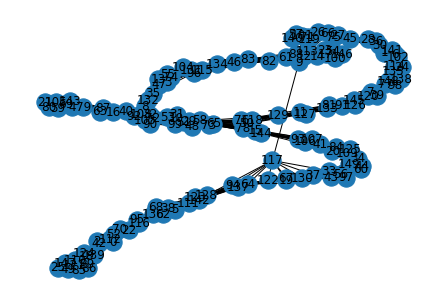

In [14]:
# Let's see how the graph looks like
nx_graph = nx.from_scipy_sparse_matrix(similarity_graph)

nx.draw(nx_graph, with_labels=True)
plt.show()

### 2. Deriving degree matrix from graph

$D = Diag(d_1, d_2, ...,d_n)$

$d_i = \sum_{k=1}^N W_{ik}$

Where W is our similarity matrix with N data points

In [15]:
degree_matrix = similarity_graph.sum(axis=1)
degree_matrix.shape

(150, 1)

In [16]:
degree_matrix[:5]

matrix([[ 9.88985997],
        [ 9.84957185],
        [ 9.40776641],
        [10.39306058],
        [10.36893174]])

In [17]:
# Checking for outlier data point having no neighbor i.e degree = 0
degree_matrix[degree_matrix == 0]

matrix([], shape=(1, 0), dtype=float64)

At this point you can see any points which have degree equal to zero as outliers. 

### 3. Constructing Normal Laplacian

L = D - W

In [18]:
np.asarray(degree_matrix).shape

(150, 1)

In [19]:
np.diag(np.asarray(degree_matrix).reshape(data_size,))

array([[ 9.88985997,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  9.84957185,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  9.40776641, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  9.88244354,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         9.87138597,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 10.81779121]])

In [20]:
diagonal_matrix = np.diag(np.asarray(degree_matrix).reshape(data_size,))
L =  diagonal_matrix - similarity_graph

In [21]:
L

matrix([[ 9.88985997,  0.        , -0.99736371, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  9.84957185,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.99736371,  0.        ,  9.40776641, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  9.88244354,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          9.87138597,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , 10.81779121]])

Note:- By subtracting the similarity matrix from the degree matrix, the effect of cycles in a graph gets nullified. Finally, the Laplacian conatains the degree on diagonals and negative of edge weights in the rest of the matrix.


In [22]:
# We can also obtain the Laplacian using scipy 

L = sparse.csgraph.laplacian(csgraph=similarity_graph)

### Properties of Laplacian

1. Real symmetric

Because its real and symmetric its eigen values are real and its eigen vectors orthogonal.

2. Positive semi-definite

The Laplacian has atleast one eigen value equal to 0. We can check this by its quadratic form. If $x$ is a n x 1 column vector , then $q = x'Lx$ is its quadratic form. 

A quadratic form is positive semi-definite if -

$ Q ≥ 0 $ for all x and Q = 0 for some $ x \ne 0 $

We will set x to be a column vector of 1's.

In [23]:
x = np.ones(shape=(data_size,1), dtype=int)

Q = np.dot(np.dot(x.T, L.todense()), x)

Q.round(10)

array([[-0.]])

Any column vector x containing same values throughout, will result in quadratic form equal to 0.
3. The number of zero eigen values of Laplacian is equal to the number of connected components of the graph



In [24]:
# Finding eigen values and eigen vectors
e, evecs = np.linalg.eig(L.todense())
e.shape, evecs.shape

((150,), (150, 150))

In [25]:
# No. of eigen values equal to 0
e_rounded_off = e.round(5)
e_rounded_off[e_rounded_off == 0].shape

(1,)

In [26]:
# No. of connected components
nx.number_connected_components(nx_graph)

1

4. Two data points similar to each other having high edge weight will have similar values at their corresponding indices in the resulting eigen vectors.
One of these eigen vectors in Fiedler vector - Eigen vector correponding to the smallest non-zero eigen value.

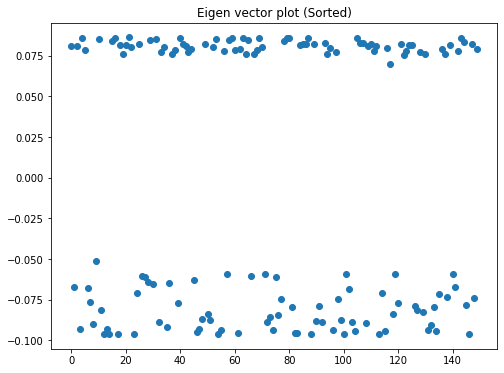

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), evecs[:,1].tolist())
plt.title("Eigen vector plot (Sorted)")
plt.show()

The data points are quite well separated by sign. 



### Application of Graph Laplacian 

By extension of all the above properties, and the fact that the eigen vector separates data points in groups, it is used for clustering. This method is called **Spectral clustering**.

This is performed by choosing a threshold to separate data points into 2 clusters from the 1st smallest eigen vector. For more than 2 clusters, we can use Kmeans algorithm to obtain k clusters directly from the first smallest K eigen vectors.


In [28]:
# Sort the eigen value 
sorted_indices = np.argsort(e)

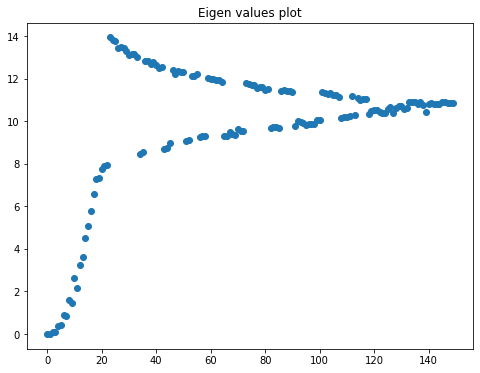

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), e)
plt.title("Eigen values plot")
plt.show()

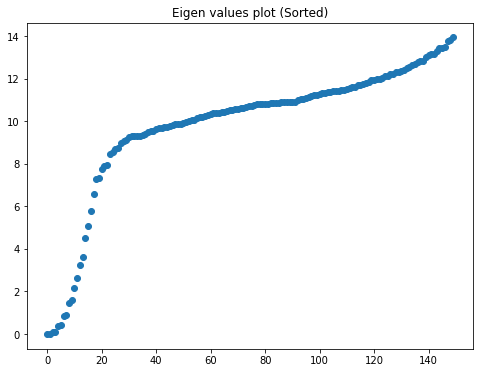

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), np.sort(e))
plt.title("Eigen values plot (Sorted)")
plt.show()

 Use Fiedler vector to partition data points

The Fiedler vector is the eigen vector corresponding to smallest non-zero eigen value. Indices of values below 0 are assigned to cluster 1 and the indices of rest of them are assigned to cluster 2. 

We are able to use this vector this way because this normalized eigen vector is a scaled version of the indicator vector. An indicator vector is associated with every non-zero eigen value of a matrix. Each indicator vector is also orthogonal to each other and ideally conatains binary values 0 or 1 to indicate cluster membership.

In this case, instead of indicator vector containing 0's and 1's, we have signed continuous values.

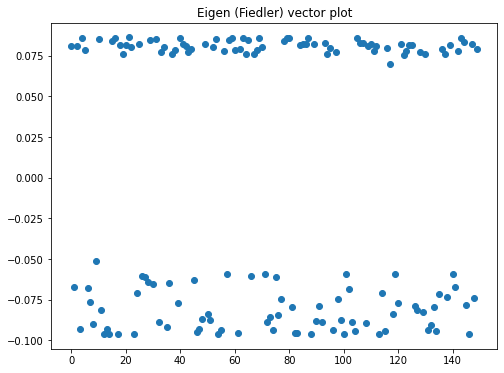

In [31]:
# Get smallest non-zero eigen value's index for obtaining partition to cluster
fiedler_index = sorted_indices[1]
fiedler_index

# The eigen vector for smallest non-zero eigen value i.e plotting the Fiedler vector
# Plotting eigen values
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), evecs[:,fiedler_index].tolist())
plt.title("Eigen (Fiedler) vector plot")
plt.show()

fiedler_vector = evecs[:,fiedler_index].copy()

# Thresholding the values in this eigen vector at 0
fiedler_vector[fiedler_vector < 0.0] = 0
fiedler_vector[fiedler_vector > 0.0] = 1

new_labels = np.asarray(fiedler_vector)[:,0]

#### Results


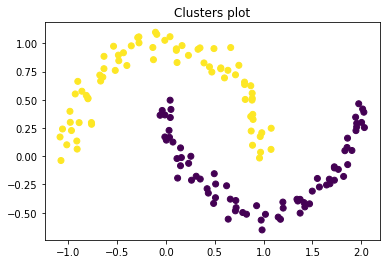

In [32]:
plt.scatter(features[:,0], features[:,1], c=new_labels.astype(float))
plt.title("Clusters plot")
plt.show()

Evaluation with entropy based external clustering evaluation measures

In [34]:
homogeneity_score(y, new_labels), completeness_score(y, new_labels), v_measure_score(y, new_labels)

(1.0, 1.0, 1.0)

### Comparison with Kmeans 

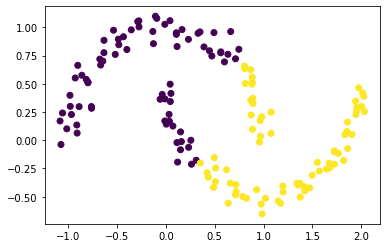

In [35]:
num_clusters = 2
kmean_labels = KMeans(n_clusters=num_clusters, random_state=random_state, n_jobs=6).fit_predict(features)
plt.scatter(features[:,0], features[:,1], c=kmean_labels.astype(float))
plt.show()

In [36]:
homogeneity_score(y, kmean_labels), completeness_score(y, kmean_labels), v_measure_score(y, kmean_labels)

(0.1836464702880451, 0.1837407327840609, 0.18369358944333708)

### Why Eigen value system, though?
Because the eigen value system approximates a graph cut.

$Cut(V1,V2) = \sum_{i \in V_1, j \in V_2} W_{ij} $

Where the graph is bipartitioned into V1 & V2.

In the above approach, the eigen values are approximating Normalized graph cut.

$ NCut(V1,V2) = \frac{Cut(V_1, V_2)}{Vol(V_1)} + \frac{Cut(V_1, V_2)}{Vol(V_2)}$

### So how is it so?
The above equation of NCut can be re-expressed as Rayleigh's quotient, whose minimum is obtained by the smallest eigen value from a generalized eigen value problem.
Let x be an N dimensional indicator vector where $x_i = 1$ if the graph node i is in $V_1$ and 0 otherwise.


$min_x Ncut(x) = min_y \frac{y^T(D-W)y}{y^Ty}$

subject to one of the conditions $y^TD1=0$ 

where $y$ is also subject to constraints as that of our indicator vector $x$.


This way the graph partitioning problem gets converted to clustering problem.

